# Problem Set #4
- MACS 30150, Dr. Evans 
- Name: Kento Yoshizawa (CNET: kyoshizawa) 
- Date: February 3, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special
import scipy.optimize as opt
import scipy.integrate as integrate
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

## Question 1.

In [2]:
data1 = np.loadtxt('data/incomes.txt')

### (a)

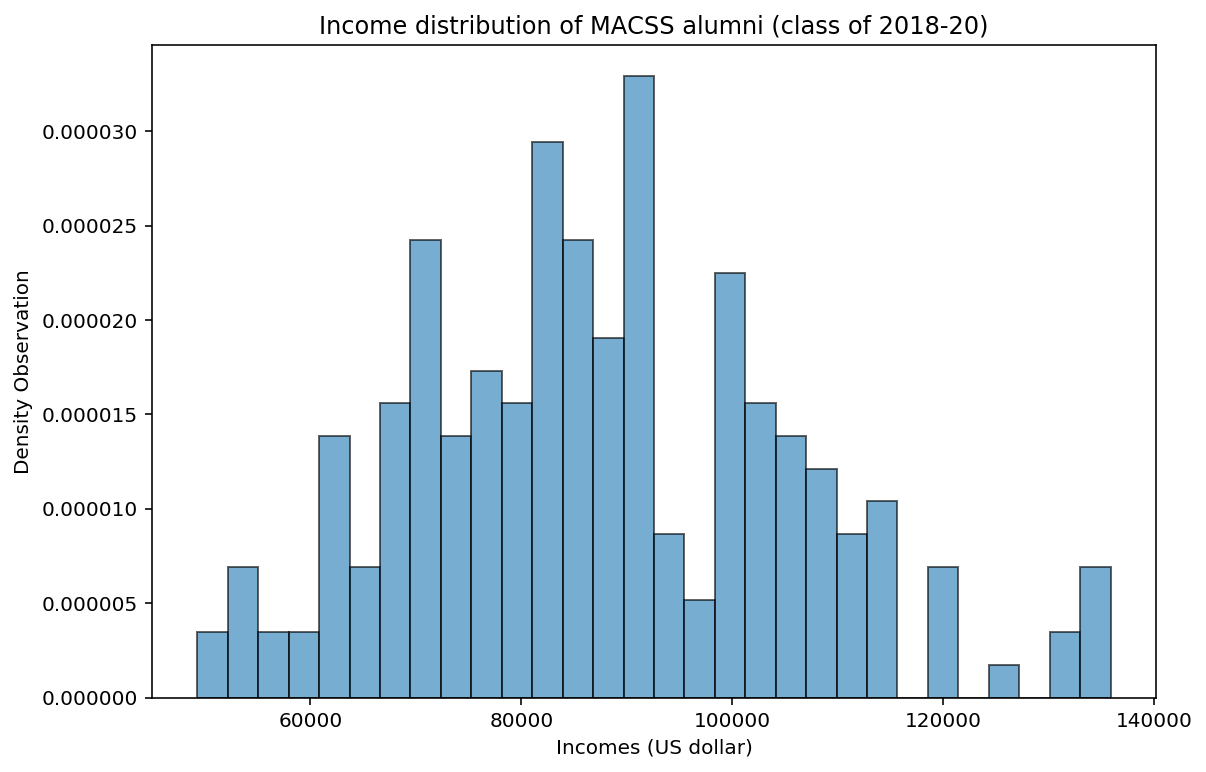

In [3]:
fig = plt.figure(figsize = (9,6))

counts, bins, _ = plt.hist(data1, 30, density = True, edgecolor = 'k', alpha = 0.6)
plt.xlabel('Incomes (US dollar)')
plt.ylabel('Density Observation')
plt.title('Income distribution of MACSS alumni (class of 2018-20)');

### (b)

In [4]:
def lognorm_pdf(xvals, mu, sigma, lb = 1e-7, ub = 1.5e+5):
    if lb != None:
        xvals[xvals < lb] = lb
    if ub != None:
        xvals[xvals >= ub] = ub
    
    pdf_vals = (1 / (xvals * sigma * np.sqrt(2*np.pi)) * np.exp(-(np.log(xvals) - mu)**2 / (2 * sigma ** 2)))
    
    return pdf_vals

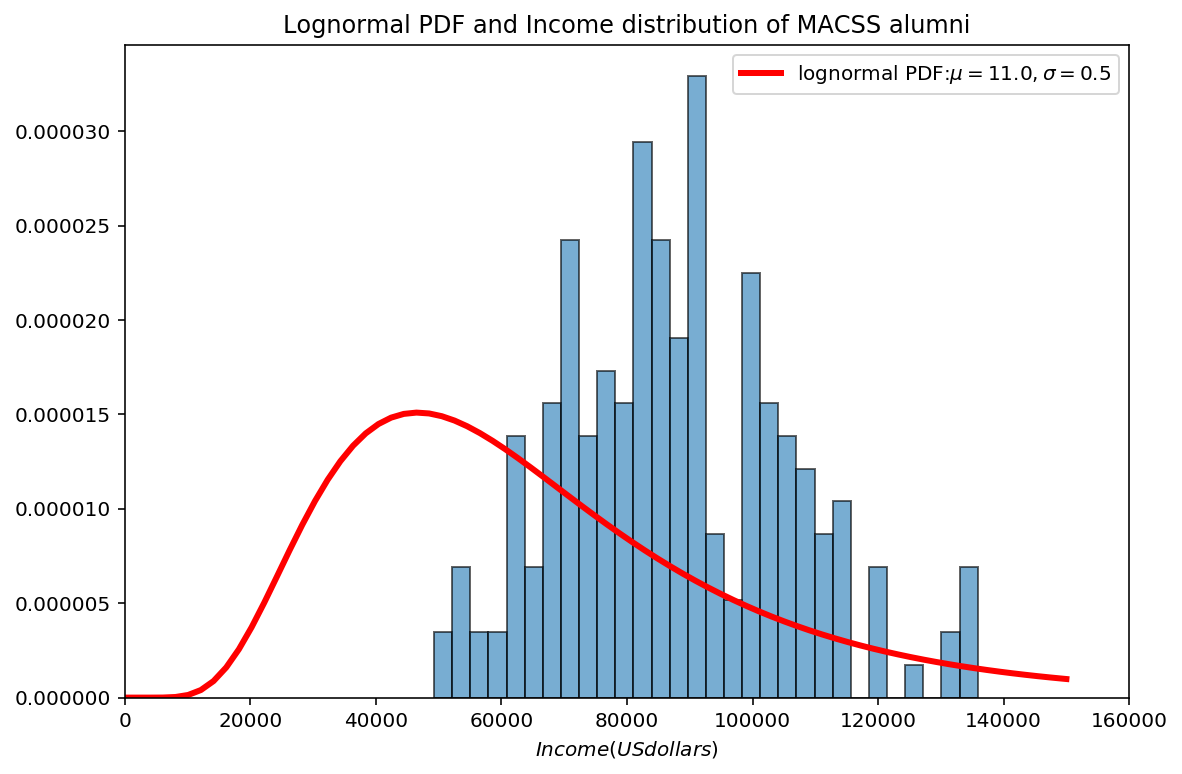

In [5]:
xvals = np.linspace(1e-7, 2e+5, 100)

fig = plt.figure(figsize = (9,6))
counts, bins, _ = plt.hist(data1, 30, density = True, edgecolor = 'k', alpha = 0.6)

plt.plot(xvals,lognorm_pdf(xvals, mu = 11., sigma = 0.5), linewidth = 3, 
         c = 'red', label = 'lognormal PDF:$\mu = 11.0, \sigma = 0.5$')

plt.xlabel('$Income (US dollars)$')
plt.xlim(0, 1.6e+5)
plt.legend()
plt.title('Lognormal PDF and Income distribution of MACSS alumni');

In [6]:
def log_lik_ln(xvals, mu, sigma):
    pdf_vals = lognorm_pdf(xvals, mu, sigma)
    pdf_vals[pdf_vals < 1e-7] = 1e-7
    ln_pdf_val = np.log(pdf_vals)
    log_lik_val = ln_pdf_val.sum()
    
    return log_lik_val

In [7]:
print('The log likelihood value for this parametarization is {0:.4f}'.format(log_lik_ln(data1, mu = 11., sigma = 0.5)))

The log likelihood value for this parametarization is -2385.8570


### (c)

In [8]:
def crit_ln(params, args):   
    xvals = args
    log_lik_val = log_lik_ln(xvals, *params)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [9]:
params_init = np.array([11, 0.5])
result_ln = opt.minimize(crit_ln, params_init, args = data1, method = 'L-BFGS-B', 
                         bounds = ((None, None),(1e-7, None)))
result_ln

      fun: 2241.7193013597625
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00190994,  0.00609361])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 63
      nit: 11
   status: 0
  success: True
        x: array([11.35902257,  0.20817798])

In [10]:
mle_mu, mle_sigma = result_ln.x

print('ML Estimated value for mu    : {0:.4f}'.format(mle_mu))
print('ML Estimated value for sigma : {0:.4f}'.format(mle_sigma))
print('Log-likelihood               : {0:.3f}'.format(log_lik_ln(data1, mle_mu, mle_sigma)))

print('\nInverse Hessian Variance-Covariance Matrix: VCV =\n', result_ln.hess_inv.todense())

ML Estimated value for mu    : 11.3590
ML Estimated value for sigma : 0.2082
Log-likelihood               : -2241.719

Inverse Hessian Variance-Covariance Matrix: VCV =
 [[ 2.20699737e-04 -6.13622423e-06]
 [-6.13622423e-06  1.17533863e-04]]


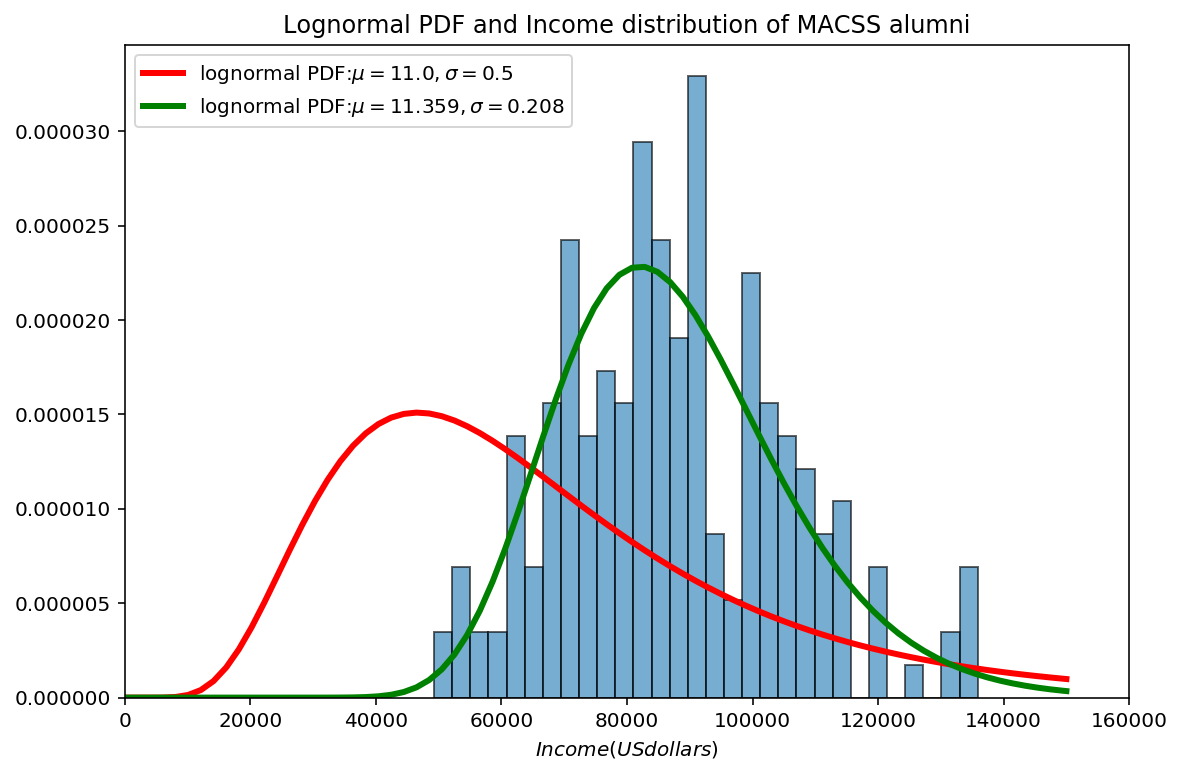

In [11]:
xvals = np.linspace(1e-7, 2e+5, 100)

fig = plt.figure(figsize = (9,6))
counts, bins, _ = plt.hist(data1, 30, density = True, edgecolor = 'k', alpha = 0.6)

plt.plot(xvals,lognorm_pdf(xvals, mu = 11., sigma = 0.5), linewidth = 3, 
         c = 'red', label = 'lognormal PDF:$\mu = 11.0, \sigma = 0.5$')
plt.plot(xvals,lognorm_pdf(xvals, mu = mle_mu, sigma = mle_sigma), linewidth = 3, 
         c = 'green', label = 'lognormal PDF:$\mu = {0:.3f}, \sigma = {1:.3f}$'.format(mle_mu, mle_sigma))

plt.xlabel('$Income (US dollars)$')
plt.xlim(0, 1.6e+5)
plt.legend()
plt.title('Lognormal PDF and Income distribution of MACSS alumni');

### (d)

In [12]:
log_lik_h0  = log_lik_ln(data1, mu = 11.,    sigma = 0.5)
log_lik_mle = log_lik_ln(data1, mu = mle_mu, sigma = mle_sigma)  

LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - stats.chi2.cdf(LR_val, 2)

print('Likelihood ratio: {0:.4f}'.format(LR_val))
print('chi squared of H0 with 2 dof p-value: {0:.5f}'.format(pval_h0))


Likelihood ratio: 288.2754
chi squared of H0 with 2 dof p-value: 0.00000


Since the p-value is closed to zero, we can easily reject the null hypothesis.

### (e)

In [13]:
prob1 = 1 - integrate.quad(lambda x: lognorm_pdf(x, mle_mu, mle_sigma, None, None), 0, 1e+5)[0]
print('The probability that I will earn more than $100,000 is {0:.3%} implied from the model'.format(prob1))

prob2 = integrate.quad(lambda x: lognorm_pdf(x, mle_mu, mle_sigma, None, None), 0, 7.5e+4)[0]
print('The probability that I will earn less than $75,000 is {0:.3%} implied from the model'.format(prob2))

The probability that I will earn more than $100,000 is 22.987% implied from the model
The probability that I will earn less than $75,000 is 26.024% implied from the model


## Question 2.

In [14]:
import pandas as pd

df = pd.read_csv('data/sick.txt')
df.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


### (a)

In [15]:
def residuals(b0, b1, b2, b3, args):
    sick, age, children, temp = args
    eps = sick - b0 - b1 * age - b2 * children - b3 * temp
    
    return eps

In [16]:
def log_lik_norm(xvals, mu, sigma):
    pdf_vals = stats.norm.pdf(xvals, loc = mu, scale = sigma)
    pdf_vals[pdf_vals < 1e-7] = 1e-7
    ln_pdf_val = np.log(pdf_vals)
    log_lik_val = ln_pdf_val.sum()
    
    return log_lik_val

In [17]:
def crit_rg(params, *args):
    b0, b1, b2, b3, sigma = params
    eps = residuals(b0, b1, b2, b3, *args)
    
    log_lik_val = log_lik_norm(eps, 0, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [18]:
## Initial guesses

b0_init = 1.
b1_init = 1.  ## the older, the easier get sick so set positive
b2_init = 1.  ## the more children, the easier get sick so set positive
b3_init = -1. ## the lower temp, the easier get sick so set negative
sigma_init = np.std(residuals(b0_init, b1_init, b2_init, b3_init, df.values.T))

params_init = np.array([b0_init, b1_init, b2_init, b3_init,sigma_init])

In [19]:
bounds = ((None, None),(None, None),(None, None),(None, None),(1e-7, None))

result_rg = opt.minimize(crit_rg, params_init, args = df.values.T, method = 'L-BFGS-B', bounds = bounds)
result_rg

      fun: -876.8650640384436
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.02036131,  0.01331273, -0.1288754 ,  1.81963742,  0.09753194])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1026
      nit: 72
   status: 0
  success: True
        x: array([ 0.2516447 ,  0.01293345,  0.40050117, -0.0099917 ,  0.00301769])

In [20]:
b0, b1, b2, b3, sigma = result_rg.x

print('ML Estimated values for coef.  : beta0 = {0:.4f}, beta1 = {1:.4f}, beta2 = {2:.4f}, beta3 = {3:.4f}'.format(b0, b1, b2, b3))
print('ML Estimated value for sigma^2 : {0:.6f}'.format(sigma**2))
print('Log-likelihood                 : {0:.3f}'.format(-result_rg.fun))

print('\nInverse Hessian Variance-Covariance Matrix: VCV =\n', result_rg.hess_inv.todense())

ML Estimated values for coef.  : beta0 = 0.2516, beta1 = 0.0129, beta2 = 0.4005, beta3 = -0.0100
ML Estimated value for sigma^2 : 0.000009
Log-likelihood                 : 876.865

Inverse Hessian Variance-Covariance Matrix: VCV =
 [[ 3.60402587e+02 -3.06904268e+00 -1.47746796e+02 -2.36674430e+00
  -1.61492353e+02]
 [-3.06904268e+00  2.63716529e-02  1.25860331e+00  2.00131884e-02
   1.37941246e+00]
 [-1.47746796e+02  1.25860331e+00  6.05695623e+01  9.69976181e-01
   6.62116915e+01]
 [-2.36674430e+00  2.00131884e-02  9.69976181e-01  1.56262883e-02
   1.05800671e+00]
 [-1.61492353e+02  1.37941246e+00  6.62116915e+01  1.05800671e+00
   7.24376996e+01]]


### (b)

In [21]:
b0_h, b1_h, b2_h, b3_h, sigma_h = 1., 0., 0., 0., np.sqrt(0.01)
params_h0 = np.array([b0_h, b1_h, b2_h, b3_h, sigma_h ])

log_lik_h0  = -crit_rg(params_h0, df.values.T)
log_lik_mle = -crit_rg(result_rg.x, df.values.T)

LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - stats.chi2.cdf(LR_val, 5)

print('Likelihood ratio: {0:.4f}'.format(LR_val))
print('chi squared of H0 with 5 dof p-value: {0:.5f}'.format(pval_h0))


Likelihood ratio: 4308.3222
chi squared of H0 with 5 dof p-value: 0.00000


Since the p-value is very closed to zero, we can easily reject the null hypothesis. Thus, it it highly unlikely that age, number of children, and average winter temperature have no effect on the number of sick days.